# Homework 2 - Linear regression and the Bias-Variance Tradeoff

### Imports

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Instructions
Complete code wherever there is a TODO. If you want to check yourself simply press ctrl+f and search for TODO 

# PART 1: Implementing linear regression
In order to better understand how linear regression works, and how the sklearn API works, in this part you shall partially implement the LinearRegression model.
Reminder: for linear regression, $\hat{f}(x)=w_0+w_1x_1+...+w_px_p$
See lecture to see how the $w_0,...,w_p$ are set (do not forget $w_0$)

a. Load the boston housing dataset we saw in recitation. Save the features in X_boston and the labels in y_boston

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#insert code here
boston = load_boston()

X_boston = pd.DataFrame(boston.data, columns= boston.feature_names)
y_boston = pd.Series(boston.target)
print(X_boston.head(2))
# y_boston.head(2)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  
0     15.3  396.9   4.98  
1     17.8  396.9   9.14  


C:\Users\itayz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

b. Implement the fit & predict methods in MyLinearRegression model (using numpy and pandas only). Note that the original input X should not be changed outside the function so use the copy method before changing it. numpy has various mathematical functions which can assist you.

In [21]:
class MyLinearRegression(object):
    
    def __init__(self):
        self.coef_: float = None
        self.intercept_: np.array = None
    
    @staticmethod
    def _add_ones(X:pd.DataFrame):
        xcp = X.copy()
        ones = pd.DataFrame(np.ones((xcp.shape[0], 1)), columns=['intercet'])
        return ones.merge(xcp, right_index=True, left_index=True)

    def fit(self, X:pd.DataFrame, y:pd.Series):
        """
        Fits the 2D input X to the label y
        :param X: 2D input (either an np.array or a pd.DataFrame)
        :param y: 1D input (either np.array or pd.Series). Dimension must match first dimension of X
        :return: self. an instance of self
        """
        #fill your code here
        xcp = MyLinearRegression._add_ones(X)
        W = (np.linalg.inv(xcp.T @ xcp) @ xcp.T) @ y
        n = W.shape[0]
        self.W = W.array.reshape((n,1))
        self.intercept_ = W[0]
        self.coef_ = W[1:]
        return self


    
    def predict(self, X):
        """
        predicts the label of each row in X
        :param X: 2D input (either an np.array or a pd.DataFrame)
        :return: 1D np.array with the predictions
        """
        return pd.DataFrame(MyLinearRegression._add_ones(X) @ self.W)[0]


c. fit your model on the boston data. and use the predict method to make check the model predictions. print out the models intercept, coeffients, and MSE. <b>DO NOT use sklearn to compute the MSE</b>.
<br>
Recommended: to check your self if your asnwers are correct, you can compare the coeffients with the original LinearRegression model. to compare arrays, you can use the allclose function of numpy. In addition, you can compare your MSE calculation to the one done by with sklearn.metrics like it was done in recitation.

In [22]:
# insert code here

my_lr = MyLinearRegression().fit(X_boston, y_boston)
true_lr = LinearRegression().fit(X_boston, y_boston)

    # if np.allclose(my_lr.coef_, true_lr.coef_): print('coef is the same')
    # else: print('coef diff')

    # if (my_lr.intercept_ - true_lr.intercept_ < 0.001): print('intercet the same')
    # else: print('intercet diff')


my_result = my_lr.predict(X_boston)
true_result = true_lr.predict(X_boston)

# if(np.allclose(my_result, true_result)): print ("prefict is the same")
# else: print("predic diff")



print('learned intercept = ', my_lr.intercept_) 
print('learned coefficients = ', my_lr.coef_.array.to_numpy()) 
print('dataset MSE = ', mean_squared_error(my_result, y_boston)) 

learned intercept =  36.45948838509597
learned coefficients =  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
dataset MSE =  21.894831181729206


d. which features have positive impact on the label (increases it), and which have negative impact on it (decreasing it)? <br> do not measure the impact of the intercept in this section.

In [23]:
print('features with positive impact on the label: ', X_boston.columns[my_lr.coef_ > 0]) 
print('features with negative impact on the label: ', X_boston.columns[my_lr.coef_ < 0]) 

features with positive impact on the label:  Index(['ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'B'], dtype='object')
features with negative impact on the label:  Index(['CRIM', 'NOX', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')


e. Choose one feature, and explain intuitely (in markdown) why it makes sense it has a positive\negative impact on the label. For full description of the features, see recitation (or simply use print(boston.DESCR))

Answer: 

**CRIM**, for example, has negative influence. pepole afraid to be victims of crimes. So high crimes rate reduces asset appeal 

# PART 2: fitting polynomial linear regression
> In a real-life situation, it is generally not possible to explicitly compute the test MSE, bias, or variance for a statistical learning method. Nevertheless, one should always keep the bias-variance trade-off in mind.

    Page 36, An Introduction to Statistical Learning with Applications in R, 2014.
**why is it that we cannot calculate the above propeties? (answer below in white highlight text to see)** <br>
<span style="color:white">because we do not have the true mapping $f(x)$. all we observe is $y$</span>.
<br>In this section we shall illustrate the difference between train and test.
Recall in the lecture 3, We have introduced the polynomial linear regression, which is linear regression with polynomial features: $f_t(x)=w_0+w_1x+w_2x^2+...+w_tx^t$
<br>
The following PolynomialLinearRegression function acts as a constructor, and creates a polynomial model (with the fit & predict methods).

In [24]:
def PolynomialLinearRegression(degree):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression())

In this section, we create an experimental data.

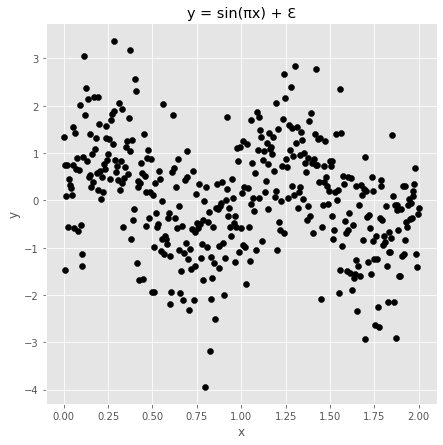

In [25]:
plt.style.use('ggplot')

# for reproducability
np.random.seed(10)

# number of observations
NUM_OBS = 400

# predictors
x = np.linspace(0, 2, num = NUM_OBS)
# noise
eps = np.random.normal(0, 1, NUM_OBS)
# outcome
y = np.sin(2*PI*x) + eps

# plot
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x, y, c = 'k')
plt.show()

#### a. Answer below: what is the true unknown function we used? what is the variance of the noise? (no explanations needed)

Answer: *the  sinus function*

To see the impact on the train and test set, we now split the data into train and test sets. we use 20% of the data for test.

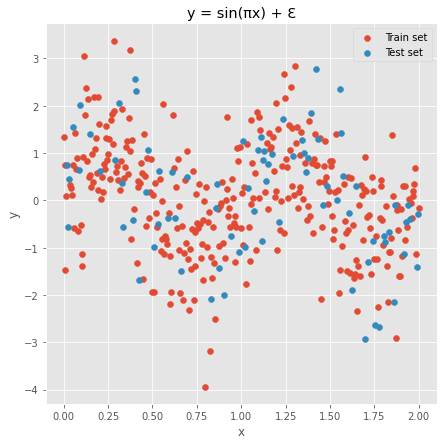

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
# plot
fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()
plt.show()

The following function tries out multiple degrees to fit the dataset. they are illustrated with their predictions on the training dataset(top-left), testing dataset (bottom-left) along with there corresponding MSE (top tight and bottom right).

In [27]:
def plot_polynomial_degrees(degrees_lst):
    train_mse = []
    test_mse = []
    train_var = []
    x_train_2d = np.expand_dims(x_train, axis=1)
    x_test_2d = np.expand_dims(x_test, axis=1)
    spaces = np.expand_dims(np.linspace(x_train.min(), x_train.max(), 500), axis=1)
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(degrees_lst))))

    fig, axs = plt.subplots(2, 2, figsize = (20,20))

    axs[0, 0].set_title('Train Set Predictions')
    axs[1, 0].set_title('Test Set Predictions')
    axs[0, 1].set_title('Train Set MSE')
    axs[1, 1].set_title('Test Set MSE')

    axs[0, 0].set_xlabel("x train")
    axs[0, 0].set_ylabel("y")
    axs[0, 0].set_ylim([-3, 3])

    axs[1, 0].set_xlabel("x test")
    axs[1, 0].set_ylabel("y")
    axs[1, 0].set_ylim([-3, 3])

    axs[0, 1].set_xlabel("polynomial degree")
    axs[0, 1].set_ylabel("train MSE")

    axs[1, 1].set_xlabel("polynomial degree")
    axs[1, 1].set_ylabel("test MSE")

    axs[0,0].scatter(x_train, y_train, c = 'k', label = "y train")
    axs[1,0].scatter(x_test, y_test, c = 'k', label = "y test")

    for k in sorted(degrees_lst):
        c = next(colors)

        # k-th degree polynomial coefficients
        reg = PolynomialLinearRegression(k)
        reg.fit(x_train_2d, y_train)

      # train and test k-th degree polynomial fit
        y_train_pred = reg.predict(x_train_2d)
        y_test_pred = reg.predict(x_test_2d)

        axs[0,0].plot(spaces[:,0],
                      reg.predict(spaces),
                      color = c, 
                      linewidth=3,
                      label = "deg: {}".format(k))

        axs[1,0].plot(spaces[:,0],
                      reg.predict(spaces),
                      color = c,
                      linewidth = 3,
                      label = "deg: {}".format(k))

      # train and test MSE of k-th degree polynomial fit 
        iter_train_mse = mean_squared_error(y_train_pred, y_train)
        iter_test_mse = mean_squared_error(y_test_pred, y_test)
        
        train_var.append(y_train_pred.var())
        train_mse.append(iter_train_mse)
        test_mse.append(iter_test_mse)

      # plot train and test MSE of k-th degree polynomial fit
        axs[0,1].plot(k,
                    iter_train_mse,
                    color = c,
                    label = "deg: {}".format(k),
                    marker = 'D',
                    markersize = 12,
                    markeredgecolor = 'black',
                    markeredgewidth = 3)

        axs[1,1].plot(k,
                    iter_test_mse,
                    color = c,
                    label = "deg: {}".format(k),
                    marker = 'D',
                    markersize = 12,
                    markeredgecolor = 'black',
                    markeredgewidth = 3)

    # plot dashed line to interpolate MSE measures
    axs[0,1].plot(degrees_lst, train_mse, 'k--')
    axs[1,1].plot(degrees_lst, test_mse, 'k--')

    # draw legends
    axs[0,1].legend(loc = "upper right",
                    bbox_to_anchor = (1.2, 1.01),
                    prop = {'size': 12})
    axs[1,1].legend(loc = "upper right",
                    bbox_to_anchor = (1.2, 1.01),
                    prop = {'size': 12})
    
    chosen_degree = degrees_lst[np.argmin(test_mse)]
    best_test_bias = degrees_lst[np.argmin(train_mse)]
    best_test_var = degrees_lst[np.argmin(train_var)]


    print("Chosen degree is: ", chosen_degree)
    return chosen_degree, best_test_bias, best_test_var

b. Below you can see an example usage plot_polynomial_degrees. Change the function such it would print the degree which generalizes best, based on the given data we generated. Do not "hard code" the number (e.g. 5), since it can vary netween data generation.
<br><b>ONLY the marked row shuld be changed!</b>

Chosen degree is:  5


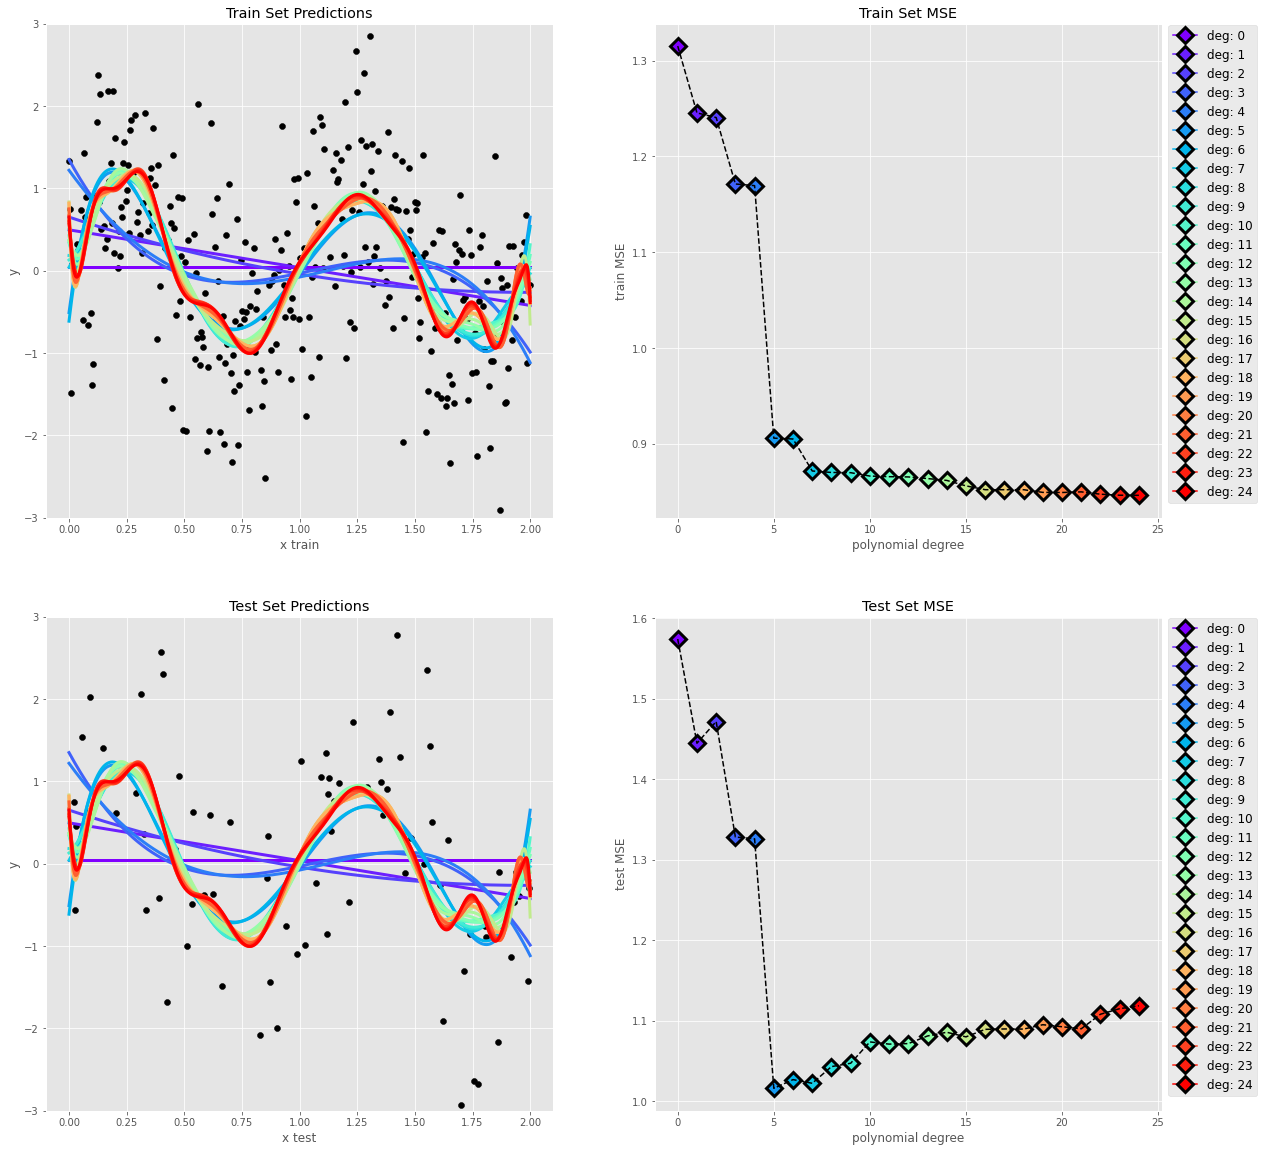

In [28]:
best_dagree, best_bias, best_var = plot_polynomial_degrees(range(25))

c. Use plot_polynomial_degrees to plot only 3 models out of the options [0,...,25]:
1. The model with the maximum bias
2. The model with the maximum variance
3. The model which generalizes best (the degree that was selected above)

best **test** bias:
Chosen degree is:  24


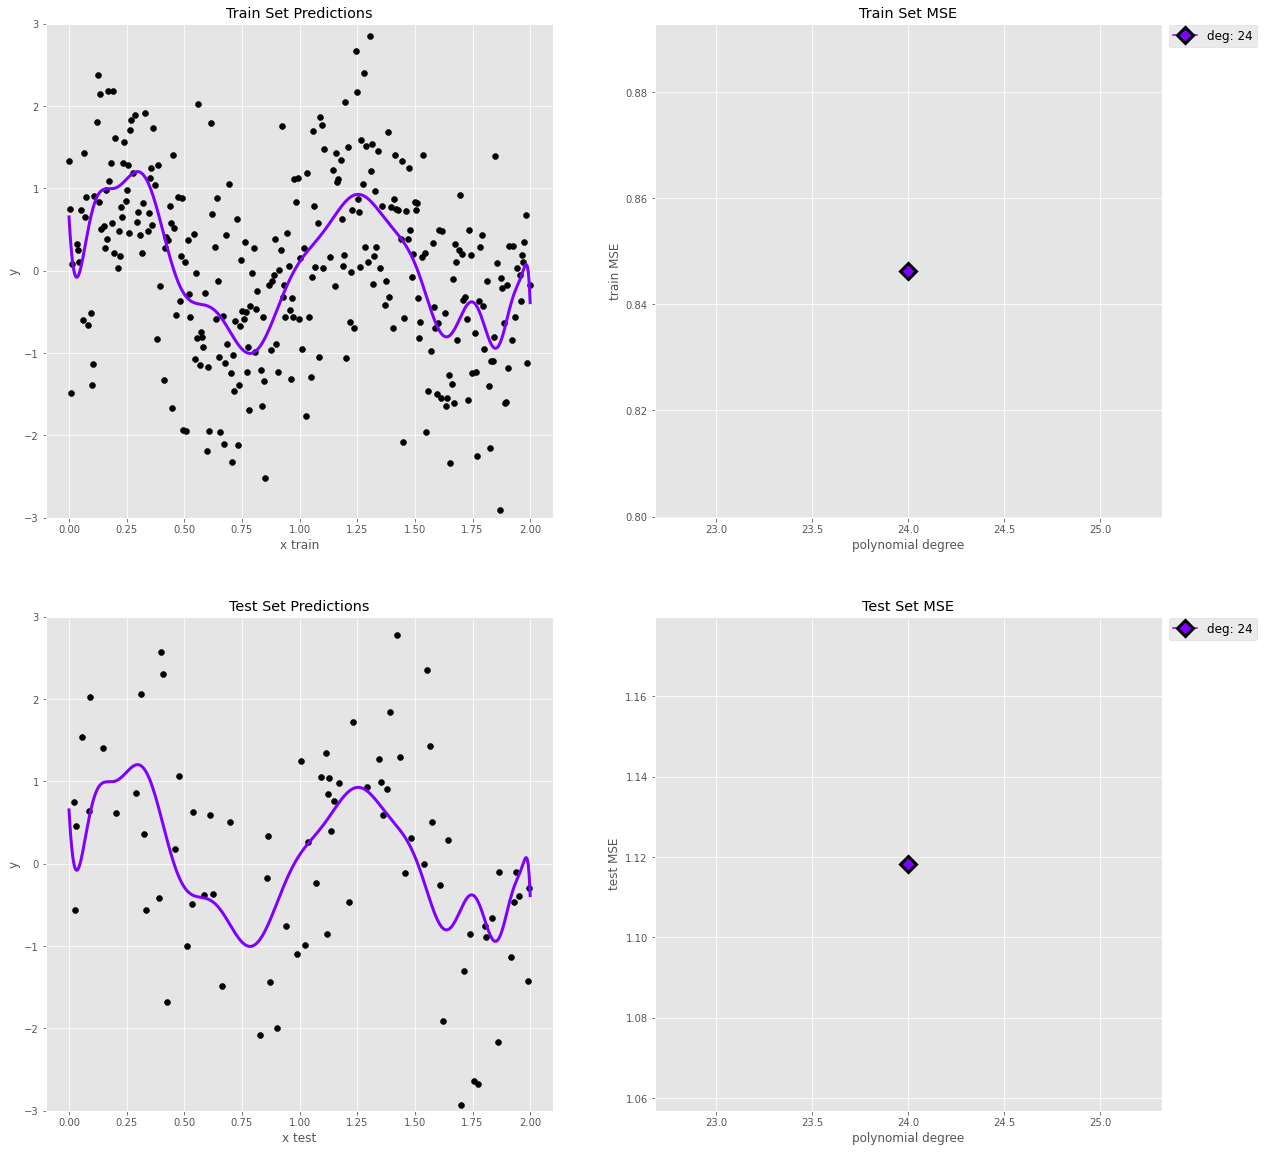

In [29]:
print('best **test** bias:')
rslt = plot_polynomial_degrees((best_bias,))




best test variace:
Chosen degree is:  0


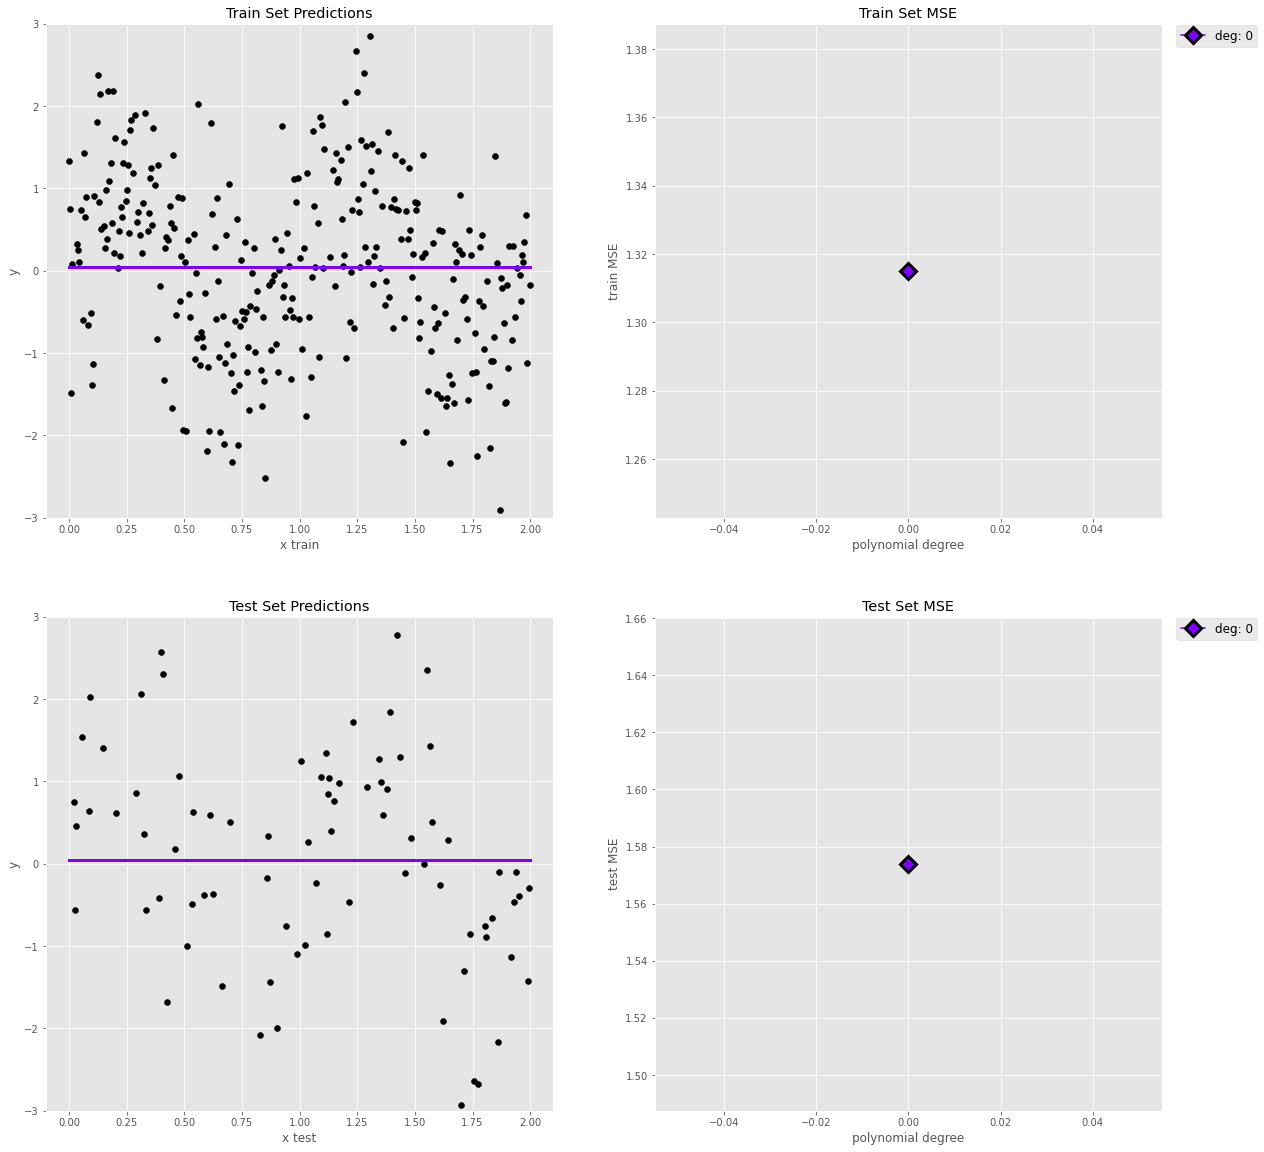

In [30]:
print('\nbest test variace:')
rslt = plot_polynomial_degrees((best_var,))



generalizes best:
Chosen degree is:  5


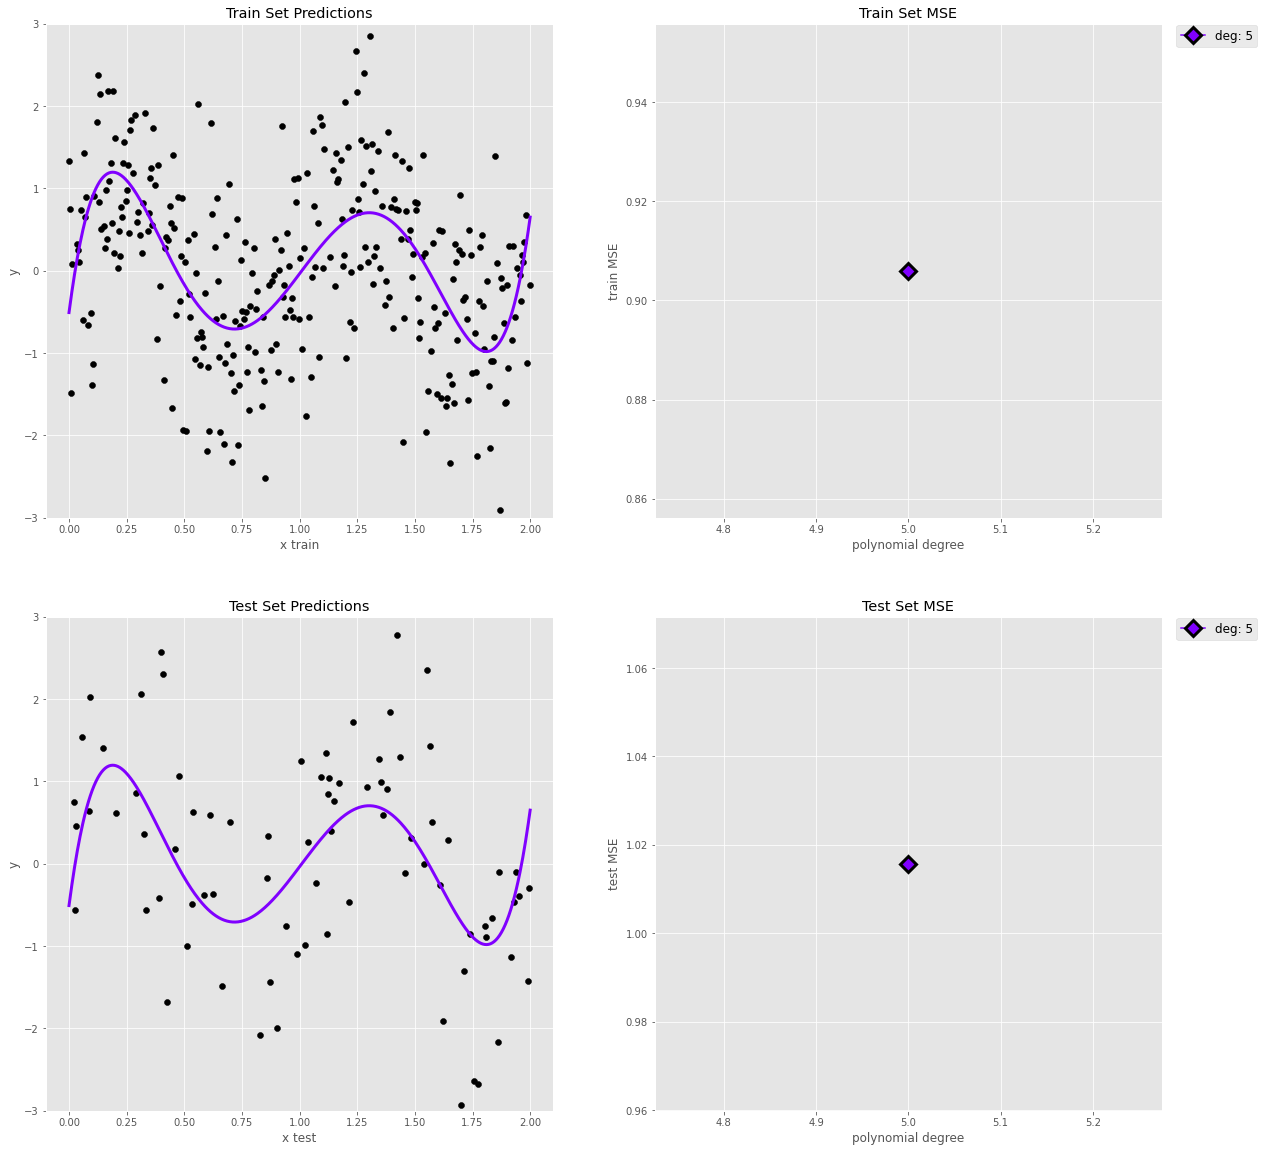

In [31]:
print('\ngeneralizes best:')
rslt = plot_polynomial_degrees((best_dagree,))
